In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [14]:
# Charger les données
df = pd.read_csv("diabetes.csv")
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [15]:
print("\nInformations générales:")
df.info()


Informations générales:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               25368

In [17]:
# Afficher les statistiques descriptives 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [18]:
# Recherche de valeurs manquantes
missing_values = df.isnull().sum()
print("\nValeurs manquantes par colonne:")
print(missing_values[missing_values > 0])
print(f"Nombre total de valeurs manquantes : {missing_values.sum()}")


Valeurs manquantes par colonne:
Series([], dtype: int64)
Nombre total de valeurs manquantes : 0


In [19]:
# Recherche de duplicates data
duplicates = df.duplicated().sum()
print(f"Nombre total des files en doublons : {duplicates}")

Nombre total des files en doublons : 23899


In [20]:
# Supprimez les valeurs dupliquées
df_unique = df.drop_duplicates()

# Sauvegardez le DataFrame nettoyé dans un fichier CSV
df_unique.to_csv('diabetes_uniques.csv', index=False)

In [23]:
# Reload df avec les lignes uniques
df = pd.read_csv("diabetes_uniques.csv")

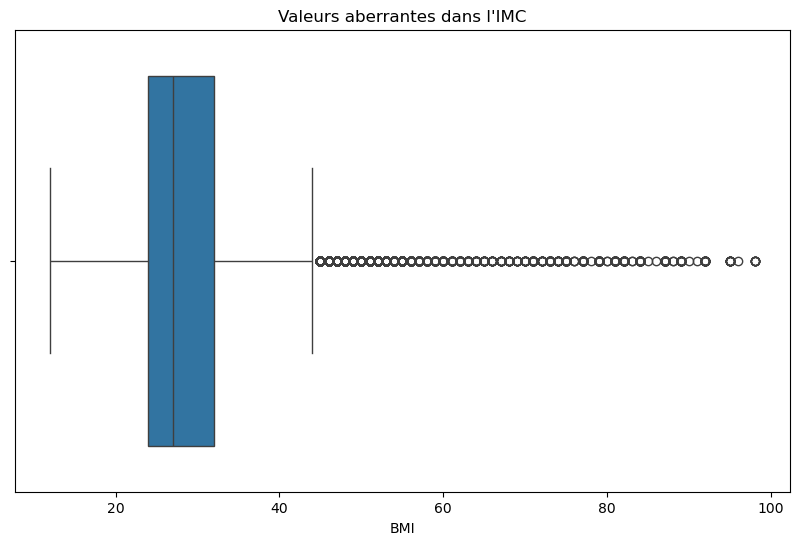

In [24]:
#Détection des valeurs aberrantes avec un boxplot pour la colonne 'BMI'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['BMI'])
plt.title("Valeurs aberrantes dans l'IMC")
plt.show()

In [25]:
# Calculer la moyenne et l'écart-type pour la colonne 'BMI'
bmi_mean = df['BMI'].mean()
bmi_std = df['BMI'].std()

# Calculer les seuils des valeurs aberrantes (3 écarts-types de la moyenne)
bmi_upper_limit = bmi_mean + 3 * bmi_std
bmi_lower_limit = bmi_mean - 3 * bmi_std

# Afficher les seuils
print("Moyenne de l'IMC :", bmi_mean)
print("Ecart-type de l'IMC :", bmi_std)
print("Seuil supérieur pour valeurs aberrantes (3 écarts-types) :", bmi_upper_limit)
print("Seuil inférieur pour valeurs aberrantes (3 écarts-types) :", bmi_lower_limit)

# Filtrer les valeurs aberrantes
outliers_bmi = df[(df['BMI'] > bmi_upper_limit) | (df['BMI'] < bmi_lower_limit)]
print("\nValeurs aberrantes dans 'BMI' :")
print(outliers_bmi[['BMI']])

Moyenne de l'IMC : 28.685670268647105
Ecart-type de l'IMC : 6.786360341527695
Seuil supérieur pour valeurs aberrantes (3 écarts-types) : 49.04475129323019
Seuil inférieur pour valeurs aberrantes (3 écarts-types) : 8.32658924406402

Valeurs aberrantes dans 'BMI' :
         BMI
201     55.0
658     50.0
670     59.0
736     50.0
758     52.0
...      ...
228849  55.0
228950  55.0
228975  51.0
229429  51.0
229443  60.0

[2547 rows x 1 columns]


In [18]:
# Calcul des seuils pour détecter les outliers basés sur l'écart-type
def detect_outliers(df, column):
    mean = df[column].mean()
    std_dev = df[column].std()
    outliers = df[(df[column] < mean - 3 * std_dev) | (df[column] > mean + 3 * std_dev)]
    return outliers

# Exemple pour la détection des outliers dans 'BMI'
outliers_bmi = detect_outliers(df, 'BMI')
print("\nValeurs aberrantes dans l'IMC (3 écarts-types):")
print(outliers_bmi)



Valeurs aberrantes dans l'IMC (3 écarts-types):
        Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
201              2.0     1.0       1.0        1.0  55.0     0.0     0.0   
203              0.0     1.0       1.0        1.0  49.0     1.0     1.0   
417              2.0     1.0       1.0        1.0  49.0     0.0     1.0   
658              1.0     0.0       0.0        1.0  50.0     1.0     0.0   
670              2.0     1.0       0.0        1.0  59.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
252819           0.0     0.0       0.0        1.0  55.0     1.0     0.0   
252844           2.0     1.0       0.0        1.0  51.0     0.0     0.0   
253316           0.0     0.0       0.0        1.0  51.0     1.0     0.0   
253330           2.0     1.0       1.0        1.0  60.0     1.0     0.0   
253402           2.0     1.0       1.0        1.0  49.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits

La moyenne de l'IMC est de 28,78 avec un écart-type de 6,78. En appliquant la règle des 3 écarts-types, le seuil supérieur est de 48,21.

Ainsi, un IMC supérieur à 49 serait statistiquement considéré comme une valeur aberrante dans ce dataset. Les valeurs de BMI supérieures à 49 peuvent donc être examinées comme des valeurs extrêmes, mais il est important de les interpréter en contexte, notamment en fonction de la variable cible Diabetes_012


Distribution de la variable cible 'Diabetes_012':
Diabetes_012
0.0    0.827114
2.0    0.152741
1.0    0.020145
Name: proportion, dtype: float64


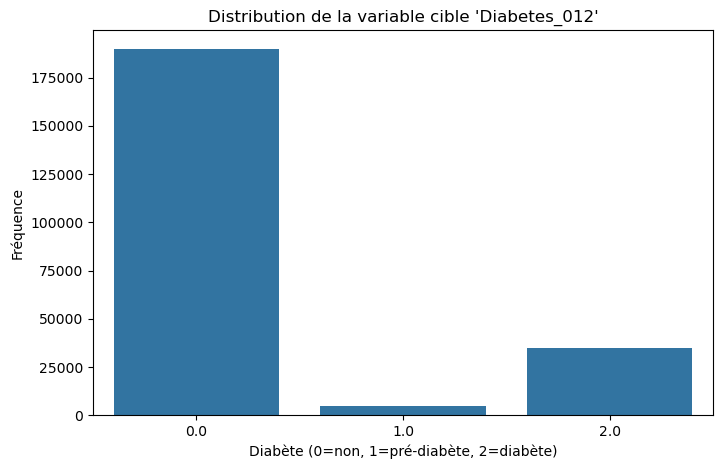

In [26]:
# Statistiques descriptives de la variable cible
print("\nDistribution de la variable cible 'Diabetes_012':")
print(df['Diabetes_012'].value_counts(normalize=True))

plt.figure(figsize=(8, 5))
sns.countplot(x=df['Diabetes_012'])
plt.title("Distribution de la variable cible 'Diabetes_012'")
plt.xlabel("Diabète (0=non, 1=pré-diabète, 2=diabète)")
plt.ylabel("Fréquence")
plt.show()

In [27]:
#Corrélations avec la variable cible
correlation_with_target = df.corr()['Diabetes_012'].sort_values(ascending=False)
print("\nCorrélation avec la variable cible 'Diabetes_012':")
print(correlation_with_target)


Corrélation avec la variable cible 'Diabetes_012':
Diabetes_012            1.000000
GenHlth                 0.284881
HighBP                  0.261976
BMI                     0.212027
DiffWalk                0.210638
HighChol                0.203327
Age                     0.184642
HeartDiseaseorAttack    0.170816
PhysHlth                0.160485
Stroke                  0.100276
CholCheck               0.075701
MentHlth                0.057698
Smoker                  0.046774
Sex                     0.032243
AnyHealthcare           0.024911
NoDocbcCost             0.023568
Fruits                 -0.025462
Veggies                -0.043446
HvyAlcoholConsump      -0.067164
PhysActivity           -0.103408
Education              -0.107742
Income                 -0.147102
Name: Diabetes_012, dtype: float64


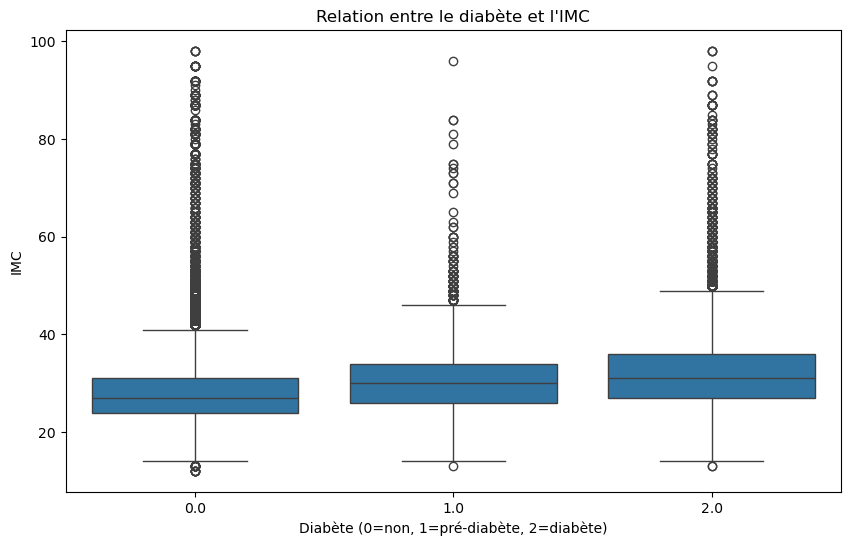

In [29]:
# Visualisation des relations entre 'Diabetes_012' et 'BMI'

plt.figure(figsize=(10, 6))
sns.boxplot(x='Diabetes_012', y='BMI', data=df)
plt.title("Relation entre le diabète et l'IMC")
plt.xlabel("Diabète (0=non, 1=pré-diabète, 2=diabète)")
plt.ylabel("IMC")
plt.show()

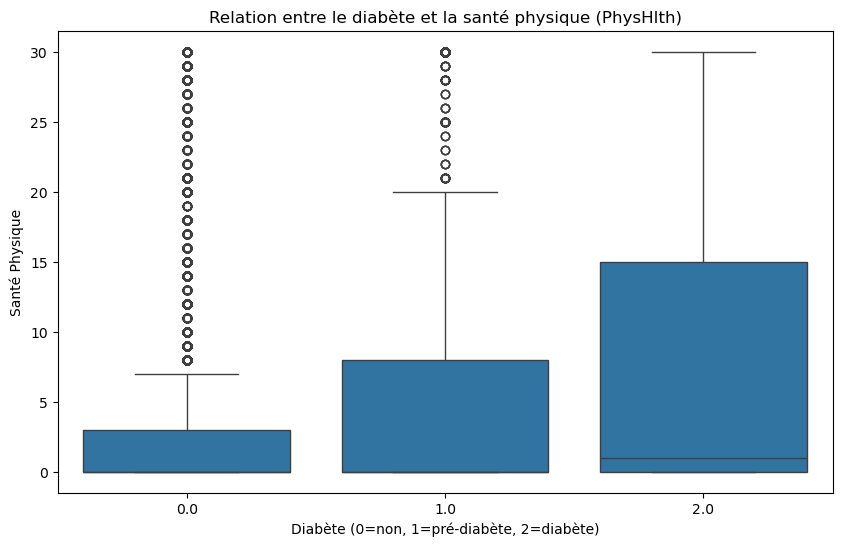

In [30]:
# Visualisation des relations entre 'Diabetes_012' et 'PhysHlth'

plt.figure(figsize=(10, 6))
sns.boxplot(x='Diabetes_012', y='PhysHlth', data=df)
plt.title("Relation entre le diabète et la santé physique (PhysHlth)")
plt.xlabel("Diabète (0=non, 1=pré-diabète, 2=diabète)")
plt.ylabel("Santé Physique")
plt.show()

<p>La distribution de 'Diabetes_012' montre une prévalence majoritaire de la catégorie 0.</p>
<p>Les variables 'HighBP' et 'BMI' montrent une corrélation notable avec 'Diabetes_012'</p>
<p>On observe des différences dans la santé physique (PhysHlth) en fonction des catégories de diabète.</p>

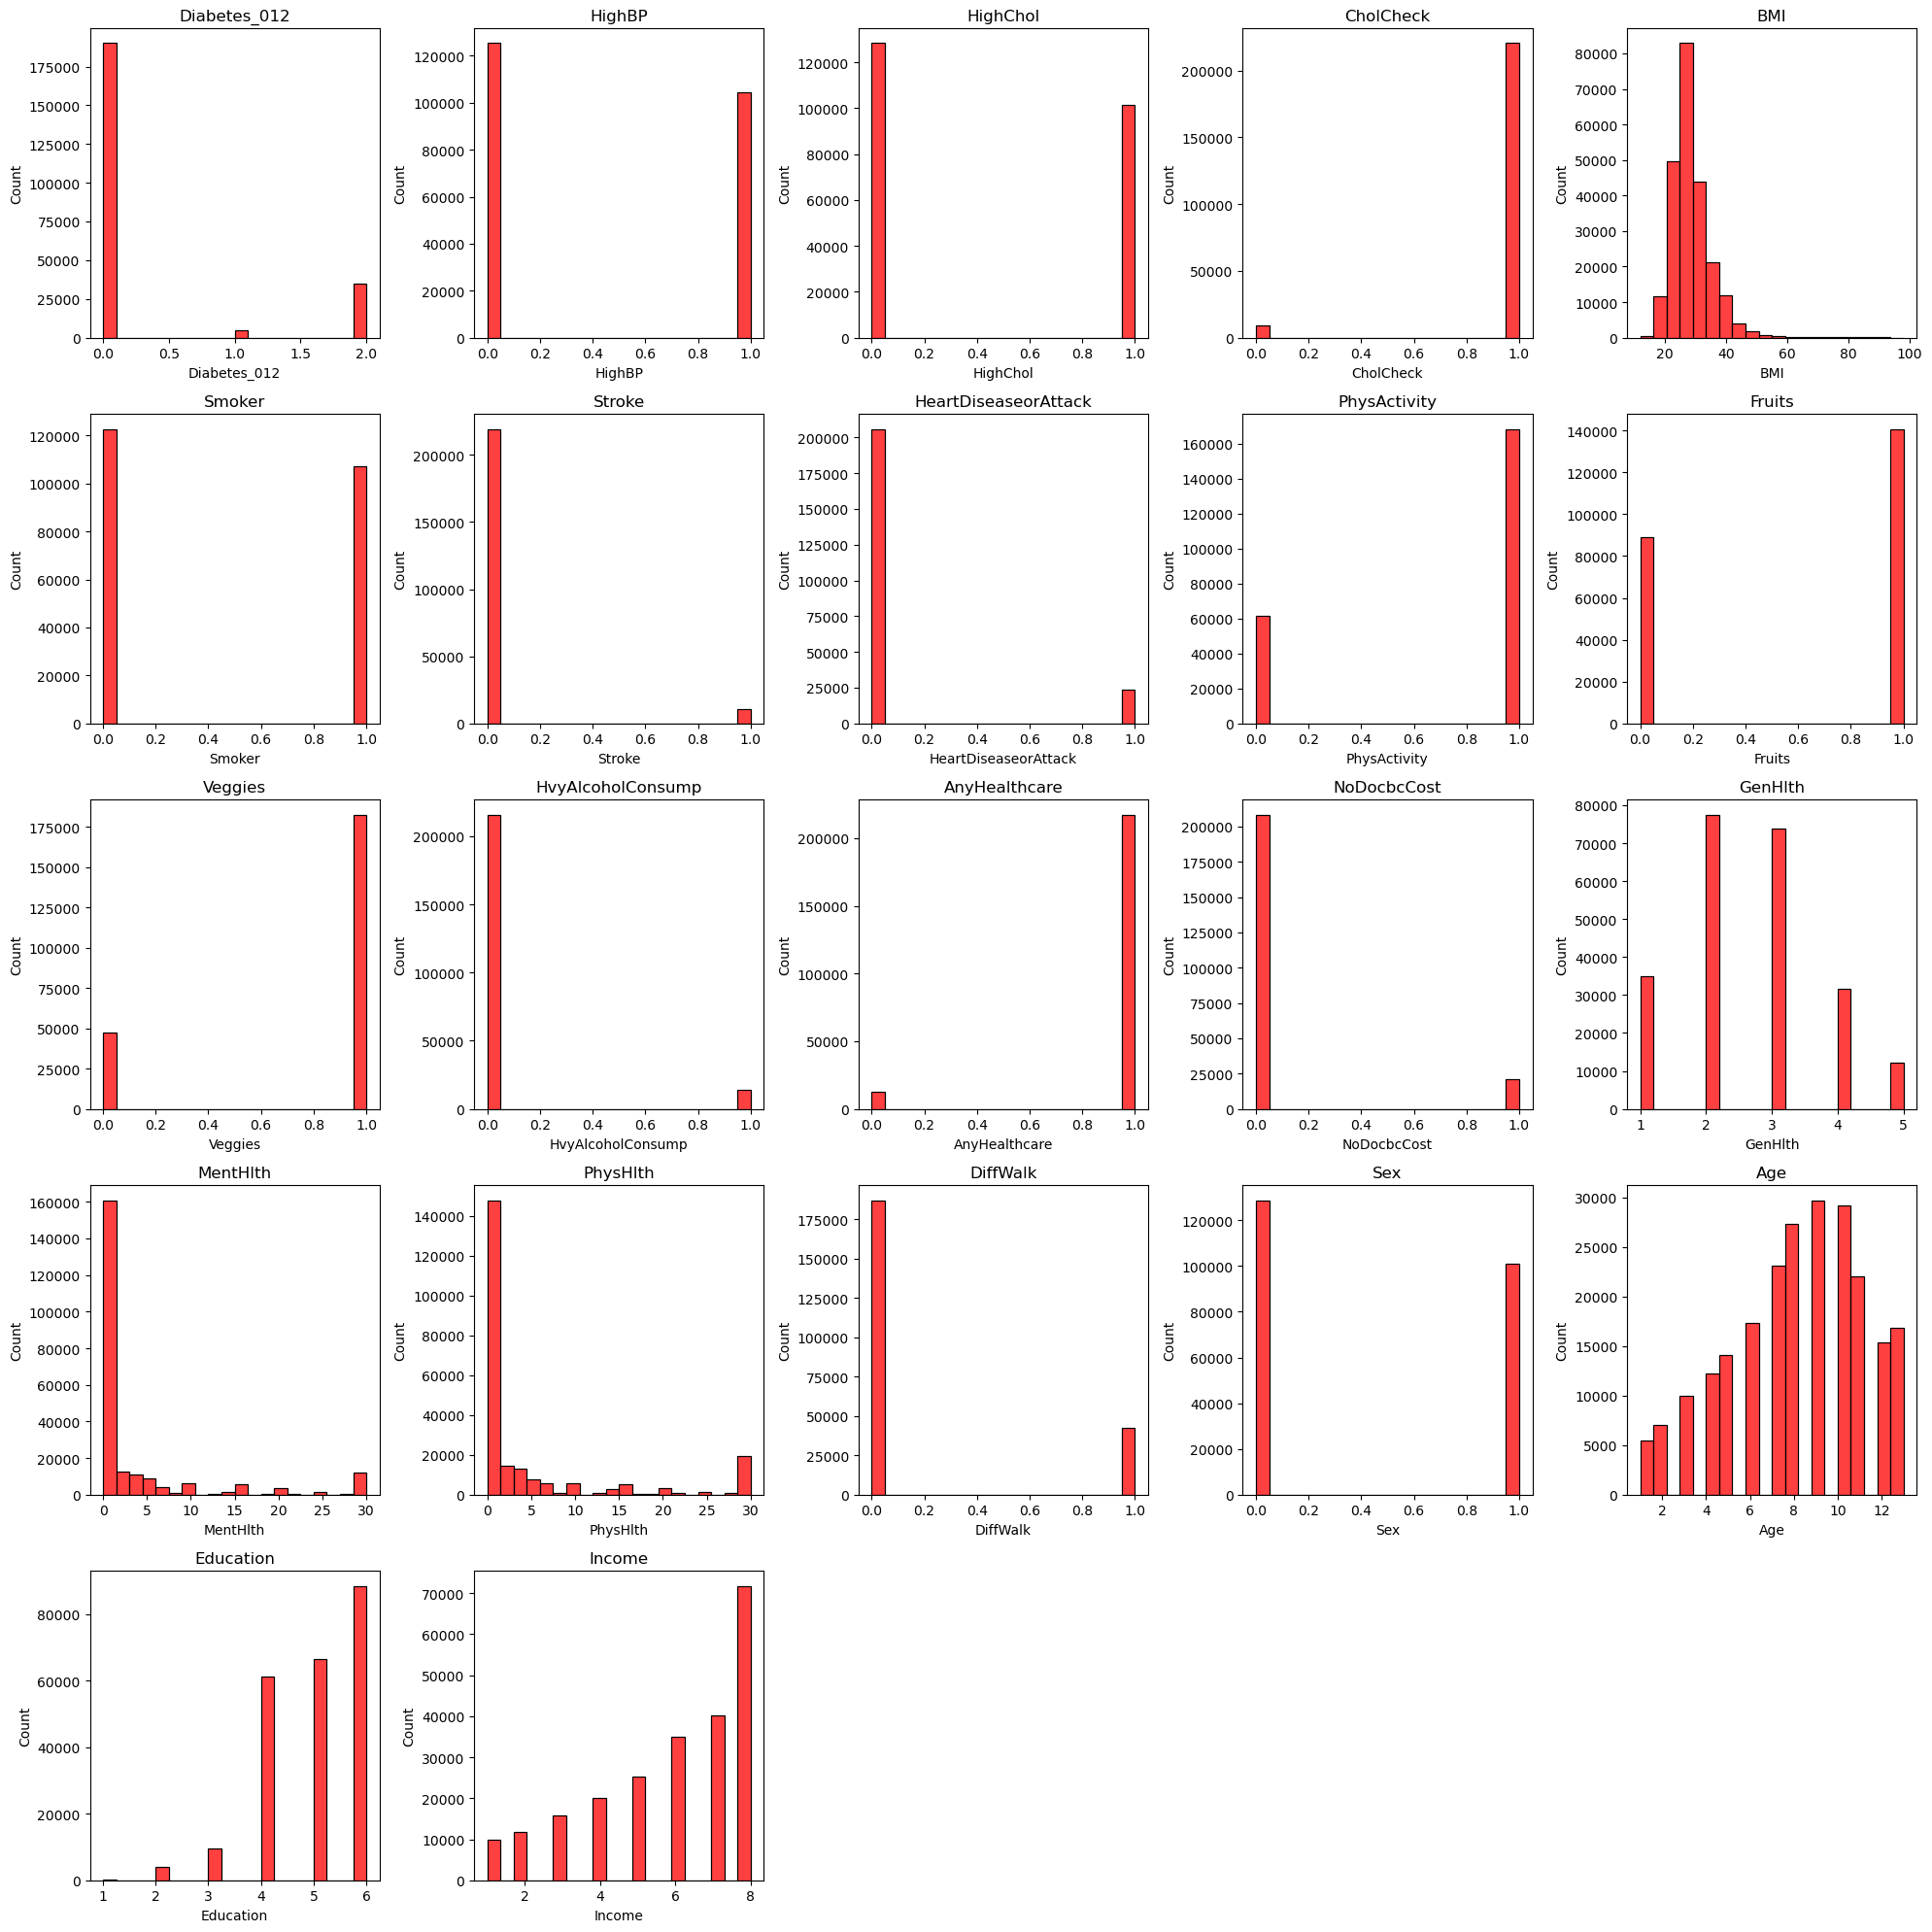

In [31]:
num_cols = df.shape[1]
nrows = math.ceil(num_cols / 5)

fig, ax = plt.subplots(nrows=nrows, ncols=5, figsize=(20, 4 * nrows))  # Adjust height dynamically
ax = ax.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(df[col], bins=20, ax=ax[i], color="red")
    ax[i].set_title(col)
    
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])
    
plt.tight_layout()
plt.show()

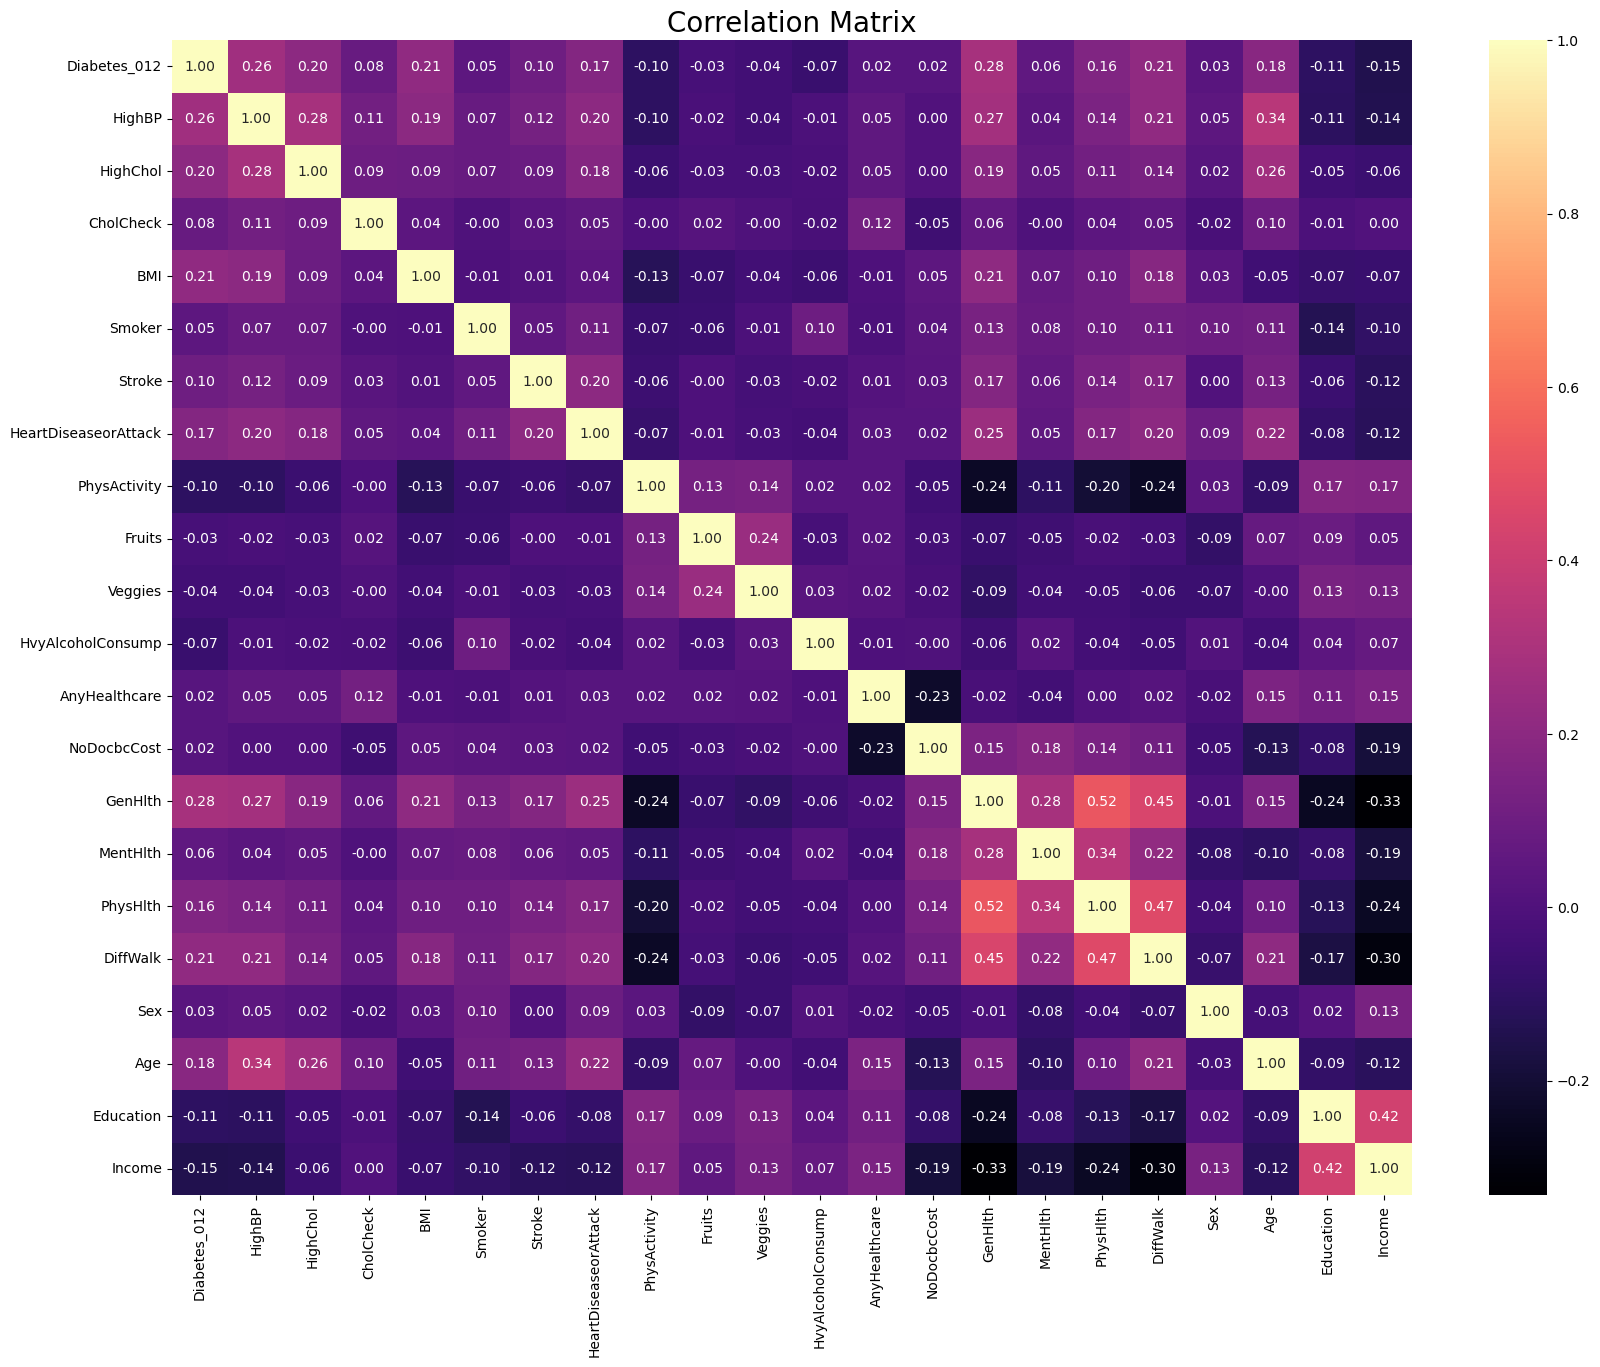

In [32]:
f,ax = plt.subplots(figsize=[20,15])
sns.heatmap(df.corr(), annot=True, fmt = '.2f', ax=ax, cmap='magma')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

avec la variable cible : Diabetes_012, on trouve que:

- GenHlth : Corrélation de 0.28. Une mauvaise santé générale semble être liée à un risque plus élevé de diabète.

- DiffWalk : Corrélation de 0.21, ce qui indique que les difficultés à marcher pourraient être associées à des cas de diabète.

- BMI : Corrélation de 0.21 avec le diabète, montrant que l’IMC plus élevé est un facteur de risque pour le diabète.

- HighBP et HeartDiseaseorAttack : Corrélations de 0.26 et 0.17 respectivement, suggérant que l'hypertension et les antécédents de maladies cardiaques sont associés à des cas de diabète.

- GenHlth a une forte corrélation avec PhysHlth (0.52) et DiffWalk (0.45), ce qui indique que les personnes en mauvaise santé générale tendent aussi à avoir des limitations physiques.

- Income et Education : Corrélées avec un coefficient de 0.42, ce qui est attendu car le niveau d'éducation peut souvent influencer le niveau de revenu.

- PhysActivity montre une corrélation négative avec Diabetes_012 (-0.12), ce qui suggère que l’activité physique pourrait réduire les risques de diabète.

- Income présente une corrélation négative avec GenHlth (-0.37), ce qui pourrait indiquer que les revenus plus élevés sont associés à une meilleure santé générale.